<img src=images/MIT_logo.jpg width=150 align=right />

# PROFESSIONAL CERTIFICATE IN DATA SCIENCE AND ANALYTICS

# Optimization: Part One

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Defining an objective function

In [2]:
def objective(x, y):
    return 5 * x + 10 * y

In [3]:
x = np.linspace(0, 10, 101)
y = np.linspace(-5, 5, 101)

objective_matrix = np.zeros((101, 101))
for i, xi in enumerate(x):
    for j, yj in enumerate(y):
        objective_matrix[i, j] = objective(xi, yj)

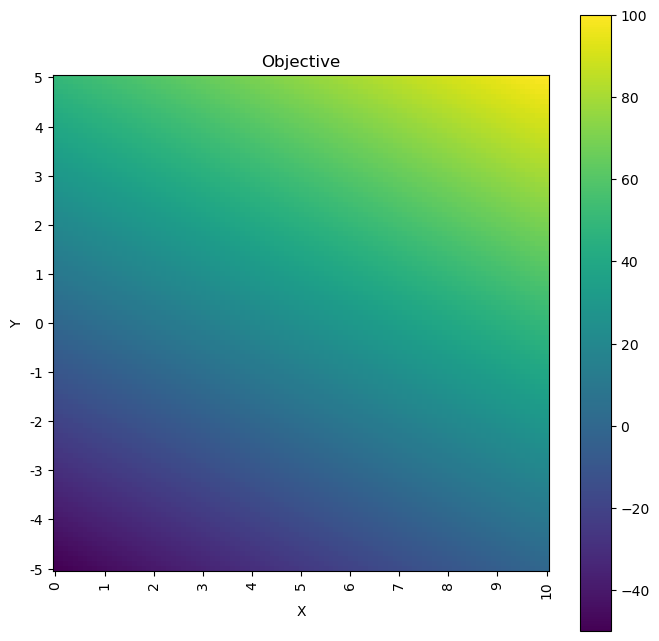

In [4]:
def plot_objective():
    plt.figure(figsize=(8, 8))

    plt.imshow(objective_matrix.T, origin='lower')

    plt.colorbar()

    plt.title('Objective')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.xticks(np.linspace(0, 100, 11), np.linspace(0, 10, 11).astype(int), rotation=90)
    plt.yticks(np.linspace(0, 100, 11), np.linspace(-5, 5, 11).astype(int))

plot_objective()
plt.show()

## Isoquant lines
Represent the points in the objective function that have the same value.

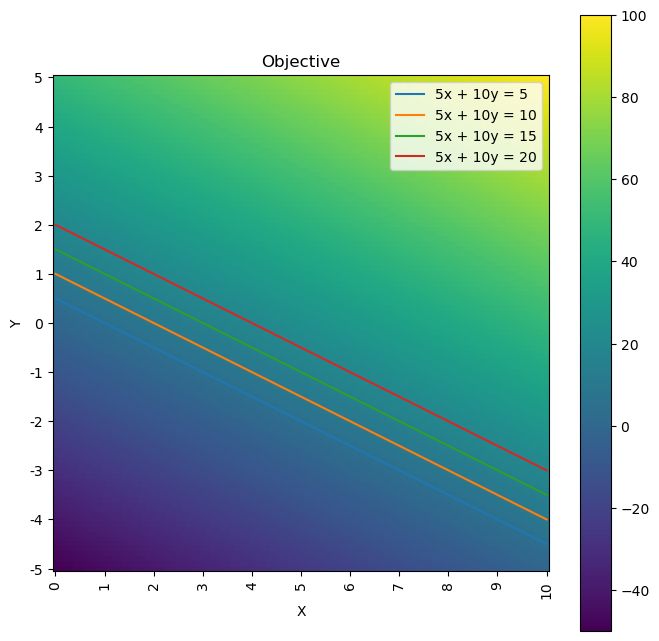

In [5]:
plot_objective()
plt.plot(10 * x, 10 * (5 * x -  5) / (-10) + 10 * 5) # 5x + 10y = 5
plt.plot(10 * x, 10 * (5 * x - 10) / (-10) + 10 * 5) # 5x + 10y = 10
plt.plot(10 * x, 10 * (5 * x - 15) / (-10) + 10 * 5) # 5x + 10y = 15
plt.plot(10 * x, 10 * (5 * x - 20) / (-10) + 10 * 5) # 5x + 10y = 20

plt.legend(['5x + 10y = 5', '5x + 10y = 10', '5x + 10y = 15', '5x + 10y = 20'])

plt.show()

## Constraints
Define the limits of the feasible region.

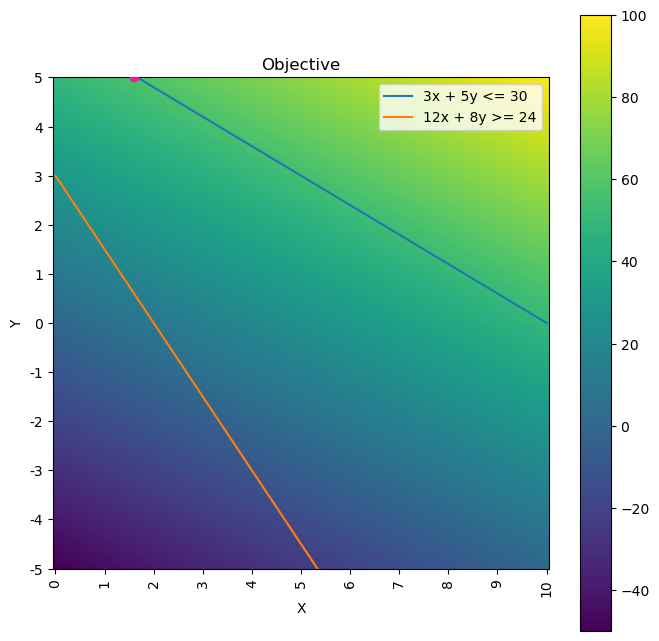

In [6]:
plot_objective()
plt.plot(10 * x, 10 * ( 3 * x - 30) / (-5) + 10 * 5) #  3x + 5y <= 30
plt.plot(10 * x, 10 * (12 * x - 24) / (-8) + 10 * 5) # 12x + 8y >= 24
plt.scatter(10 * 1.6, 10 * (5 + 5), c='deeppink', zorder=10)
plt.ylim(0, 100)

plt.legend(['3x + 5y <= 30', '12x + 8y >= 24'])

plt.show()

## Finding the solution

In [7]:
from scipy.optimize import linprog

obj = [-5.0, -10.0] # Parameters of the objective function

# Constraints
lhs_ineq = [[  3.0,  5.0], # First constraint
            [-12.0, -8.0], # Second constraint
            [ -1.0, -0.0], # Lower bound on X
            [  1.0,  0.0], # Upper bound on X
            [ -0.0, -1.0], # Lower bound on Y
            [  0.0,  1.0]] # Upper bound on Y
rhs_ineq = [ 30,
            -24,
              0, # X must be greater than 0
             10, # and less than 10
              5, # Y must be greater than -5
              5] # and less than 5

opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq)
opt

           con: array([], dtype=float64)
 crossover_nit: 0
         eqlin:  marginals: array([], dtype=float64)
  residual: array([], dtype=float64)
           fun: -58.333333333333336
       ineqlin:  marginals: array([-1.66666667, -0.        , -0.        , -0.        , -0.        ,
       -1.66666667])
  residual: array([ 0.        , 36.        ,  1.66666667,  8.33333333, 10.        ,
        0.        ])
         lower:  marginals: array([0., 0.])
  residual: array([1.66666667, 5.        ])
       message: 'Optimization terminated successfully. (HiGHS Status 7: Optimal)'
           nit: 1
         slack: array([ 0.        , 36.        ,  1.66666667,  8.33333333, 10.        ,
        0.        ])
        status: 0
       success: True
         upper:  marginals: array([0., 0.])
  residual: array([inf, inf])
             x: array([1.66666667, 5.        ])

## Solving the bus example
![](images/problem.png)

In [8]:
obj = [-10, -8, -5] # Parameters of the objective function

# Constraints
lhs_ineq = [[50000,  70000,   0], # Budget
            [  -25,    -50, -50], # Seating capacity
            [    0,      0,   1], # Number of C buses
            [    1,      1,   1], # Total number of buses
            [   -1,      0,   0], # Positive number of A buses
            [    0,     -1,   0], # Positive number of B buses
            [    0,      0,  -1]] # Positive number of C buses
rhs_ineq = [10000000,
              -15000,
                 400,
                 450,
                   0,
                   0,
                   0]

opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq)
opt

           con: array([], dtype=float64)
 crossover_nit: 0
         eqlin:  marginals: array([], dtype=float64)
  residual: array([], dtype=float64)
           fun: -3250.0
       ineqlin:  marginals: array([-1.e-04, -0.e+00, -0.e+00, -5.e+00, -0.e+00, -0.e+00, -0.e+00])
  residual: array([   0., 2500.,  150.,    0.,  200.,    0.,  250.])
         lower:  marginals: array([0., 4., 0.])
  residual: array([200.,   0., 250.])
       message: 'Optimization terminated successfully. (HiGHS Status 7: Optimal)'
           nit: 2
         slack: array([   0., 2500.,  150.,    0.,  200.,    0.,  250.])
        status: 0
       success: True
         upper:  marginals: array([0., 0., 0.])
  residual: array([inf, inf, inf])
             x: array([200.,   0., 250.])